In [1]:
# Import main packages
import pandas as pd
import os

from datetime import datetime
from urllib.parse import urlparse
from tqdm import tqdm
import json
import numpy as np

# Pandas display full column
pd.set_option('display.max_colwidth', 500)


# Define directories
def find_directory_upwards(dir_name):
    """
    Find the absolute path to a directory with the given name by searching upwards
    from the current notebook's directory.

    Parameters:
    dir_name (str): The name of the directory to find.

    Returns:
    str: The absolute path to the directory if found, otherwise None.
    """
    # Get the current notebook's directory
    current_dir = os.getcwd()
    
    while True:
        # Check if the directory exists in the current directory
        potential_path = os.path.join(current_dir, dir_name)
        if os.path.isdir(potential_path):
            return potential_path
        
        # Move to the parent directory
        parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
        
        # If the current directory is the root directory, stop searching
        if current_dir == parent_dir:
            break
        
        current_dir = parent_dir
    
    # If the directory is not found, return None
    return None

code_dir = find_directory_upwards('codes')
raw_data_dir = find_directory_upwards('raw_data')
int_data_dir = find_directory_upwards('int_data')
final_data_dir = find_directory_upwards('final_data')
output_dir = find_directory_upwards('output')

print(code_dir)
# print(raw_data_dir)
print(int_data_dir)
print(output_dir)

/home/sosajuanbautista/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


/home/sosajuanbautista/aeai-filestore/projects/agentic/codes
/home/sosajuanbautista/aeai-filestore/projects/agentic/int_data
/home/sosajuanbautista/aeai-filestore/projects/agentic/output


In [ ]:
import json
import os
import nest_asyncio  # Import nest_asyncio

from scrapegraphai.graphs import SmartScraperGraph
from dotenv import load_dotenv

# Apply the nest_asyncio patch
nest_asyncio.apply()

# Load environment variables
load_dotenv('/home/sosajuanbautista/aeai-filestore/projects/agentic/codes/price_retrieval/.env', override=True)  # !!! Juan's API key. Dont use!

# Define the configuration for the scraping pipeline
graph_config = {
    "llm": {
        "api_key": os.getenv("OPENAI_API_KEY"),
        "model": "openai/gpt-4o-mini",
    },
    "verbose": True,
    "headless": True,
}

# Create the SmartScraperGraph instance
smart_scraper_graph = SmartScraperGraph(
    prompt="Find some information about what does the company do, the name and a contact email.",
    source="https://scrapegraphai.com/",
    config=graph_config
)

# Run the pipeline
result = smart_scraper_graph.run()
print(json.dumps(result, indent=4))


In [7]:
import json
import os
import nest_asyncio  # Import nest_asyncio

from scrapegraphai.graphs import SmartScraperGraph
from dotenv import load_dotenv

# Apply the nest_asyncio patch
nest_asyncio.apply()

# Load environment variables
load_dotenv('/home/sosajuanbautista/aeai-filestore/projects/agentic/codes/price_retrieval/.env', override=True)  # !!! Juan's API key. Dont use!

# Define the configuration for the scraping pipeline
graph_config = {
    "llm": {
        "api_key": os.getenv("OPENAI_API_KEY"),
        "model": "openai/gpt-4o-mini",
    },
    "verbose": True,
    "headless": True,
}

# Create the SmartScraperGraph instance
smart_scraper_graph = SmartScraperGraph(
    prompt="Find all the farming excavator models that appear in the page and retrieve their name and their price.",
    # source="https://www.machinerypete.com/construction/excavators/caterpillar",
    # source="https://www.tractorhouse.com/listings/for-sale/deere/excavators/1031",
    source="https://www.farmcountrytrader.com/search?cat=164",
    config=graph_config
)

# Run the pipeline
result = smart_scraper_graph.run()
print(json.dumps(result, indent=4))


--- Executing Fetch Node ---
--- (Fetching HTML from: https://www.farmcountrytrader.com/search?cat=164) ---


--- Executing ParseNode Node ---
--- Executing GenerateAnswer Node ---


{
    "farming_excavators": [
        {
            "name": "2023 JCB 131X LC",
            "price": "$160,318"
        },
        {
            "name": "2019 New Holland E37C",
            "price": "$49,500"
        },
        {
            "name": "2020 Bobcat E35",
            "price": "$49,500"
        },
        {
            "name": "2022 Bobcat E35R2",
            "price": "$49,500"
        },
        {
            "name": "2023 JCB 220X",
            "price": "$268,320"
        },
        {
            "name": "2024 JCB 18Z-1",
            "price": "$42,015"
        },
        {
            "name": "2024 JCB 35Z-1",
            "price": "$74,919"
        },
        {
            "name": "2023 JCB 35Z-1",
            "price": "$58,618"
        },
        {
            "name": "2023 YANMAR VIO35-6A",
            "price": "$43,900"
        }
    ]
}


In [4]:
import json
import os
import nest_asyncio  # Import nest_asyncio

from scrapegraphai.graphs import SmartScraperGraph
from dotenv import load_dotenv

# Apply the nest_asyncio patch
nest_asyncio.apply()

# Load environment variables
load_dotenv('/home/sosajuanbautista/aeai-filestore/projects/agentic/codes/price_retrieval/.env', override=True)  # !!! Juan's API key. Dont use!

from scrapegraphai.graphs import ScriptCreatorGraph

graph_config = {
    "llm": {
        "api_key": os.getenv("OPENAI_API_KEY"),
        "model": "openai/gpt-4o-mini",
        
    },
    "library": "beautifulsoup4",
    "verbose": True,
    "headless": True,
}

script_creator_graph = ScriptCreatorGraph(
   prompt="Create a Python script to scrape the projects.",
   source="https://perinim.github.io/projects/",
   config=graph_config
)

result = script_creator_graph.run()
print(result)

--- Executing Fetch Node ---
--- (Fetching HTML from: https://perinim.github.io/projects/) ---


--- Executing ParseNode Node ---
--- Executing GenerateScraper Node ---


```python
import requests
from bs4 import BeautifulSoup
import json

def main():
    url = "https://perinim.github.io/projects/"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    projects = []
    project_cards = soup.find_all('div', class_='grid-item')

    for card in project_cards:
        title = card.find('h4', class_='card-title').text
        description = card.find('p', class_='card-text').text
        link = card.find('a')['href']
        projects.append({
            'title': title,
            'description': description,
            'link': link
        })

    print(json.dumps(projects, indent=4))

if __name__ == "__main__":
    main()
```


In [5]:
import requests
from bs4 import BeautifulSoup
import json

def main():
    url = "https://perinim.github.io/projects/"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    projects = []
    project_cards = soup.find_all('div', class_='grid-item')

    for card in project_cards:
        title = card.find('h4', class_='card-title').text
        description = card.find('p', class_='card-text').text
        link = card.find('a')['href']
        projects.append({
            'title': title,
            'description': description,
            'link': link
        })

    print(json.dumps(projects, indent=4))

if __name__ == "__main__":
    main()


[
    {
        "title": "Rotary Pendulum RL",
        "description": "Open Source project aimed at controlling a real life rotary pendulum using RL algorithms",
        "link": "/projects/rotary-pendulum-rl/"
    },
    {
        "title": "DQN Implementation from scratch",
        "description": "Developed a Deep Q-Network algorithm to train a simple and double pendulum",
        "link": "https://github.com/PeriniM/DQN-SwingUp"
    },
    {
        "title": "Multi Agents HAED",
        "description": "University project which focuses on simulating a multi-agent system to perform environment mapping. Agents, equipped with sensors, explore and record their surroundings, considering uncertainties in their readings.",
        "link": "https://github.com/PeriniM/Multi-Agents-HAED"
    },
    {
        "title": "Wireless ESC for Modular Drones",
        "description": "Modular drone architecture proposal and proof of concept. The project received maximum grade.",
        "link": "/projects/

In [6]:
import json
import os
import nest_asyncio  # Import nest_asyncio

from scrapegraphai.graphs import SmartScraperGraph
from dotenv import load_dotenv

# Apply the nest_asyncio patch
nest_asyncio.apply()

# Load environment variables
load_dotenv('/home/sosajuanbautista/aeai-filestore/projects/agentic/codes/price_retrieval/.env', override=True)  # !!! Juan's API key. Dont use!

from scrapegraphai.graphs import ScriptCreatorGraph

graph_config = {
    "llm": {
        "api_key": os.getenv("OPENAI_API_KEY"),
        "model": "openai/gpt-4o-mini",
        
    },
    "library": "beautifulsoup4",
    "verbose": True,
    "headless": True,
}

script_creator_graph = ScriptCreatorGraph(
    prompt="Find all the farming excavator models that appear in the page and retrieve their name and their price.",
    source="https://www.machinerypete.com/construction/excavators/caterpillar",
   config=graph_config
)

result = script_creator_graph.run()
print(result)

--- Executing Fetch Node ---
--- (Fetching HTML from: https://www.machinerypete.com/construction/excavators/caterpillar) ---
--- Executing ParseNode Node ---
--- Executing GenerateScraper Node ---
                             Node provided with 3 chunks but can only "
                            "support 1, ignoring remaining chunks


```python
import requests
from bs4 import BeautifulSoup
import json

def main():
    url = "https://www.machinerypete.com/construction/excavators/caterpillar"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    listings = []
    for listing in soup.find_all('script'):
        if 'LISTINGS' in listing.text:
            data = listing.string
            start = data.find('[')
            end = data.find(']')
            json_data = data[start:end+1]
            listings = json.loads(json_data)
            break

    excavators = []
    for item in listings:
        if 'Excavators' in item.get('item_category3', ''):
            excavators.append({
                'name': item['item_name'],
                'price': item.get('price', 'Not listed')
            })

    print(json.dumps(excavators, indent=2))

if __name__ == "__main__":
    main()
```


In [26]:
import requests
from bs4 import BeautifulSoup
import json

def main():
    url = "https://www.machinerypete.com/construction/excavators/caterpillar"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    listings = []
    for listing in soup.find_all('script'):
        if 'LISTINGS' in listing.text:
            data = listing.string
            start = data.find('[')
            end = data.find(']')
            json_data = data[start:end+1]
            listings = json.loads(json_data)
            break

    excavators = []
    for item in listings:
        if 'Excavators' in item.get('item_category3', ''):
            excavators.append({
                'name': item['item_name'],
                'price': item.get('price', 'Not listed')
            })

    print(json.dumps(excavators, indent=2))

if __name__ == "__main__":
    main()

[
  {
    "name": "2015 Caterpillar 335FL CR",
    "price": null
  },
  {
    "name": "2018 Caterpillar 313F L GC",
    "price": null
  },
  {
    "name": "2018 Caterpillar 313F L GC",
    "price": null
  },
  {
    "name": "2023 Caterpillar 308 CR",
    "price": null
  },
  {
    "name": "2022 Caterpillar 330",
    "price": null
  },
  {
    "name": "2018 Caterpillar 313F L GC",
    "price": null
  },
  {
    "name": "2018 Caterpillar 313F L GC",
    "price": null
  },
  {
    "name": "2023 Caterpillar 305CR",
    "price": null
  },
  {
    "name": "2017 Caterpillar 313F L GC",
    "price": null
  },
  {
    "name": "2018 Caterpillar 313F L GC",
    "price": null
  },
  {
    "name": "2013 Caterpillar 305ECR",
    "price": null
  },
  {
    "name": "Caterpillar 314D LCR",
    "price": 78500
  },
  {
    "name": "1995 Caterpillar 322BL",
    "price": null
  },
  {
    "name": "2008 Caterpillar 330DL",
    "price": 79500
  },
  {
    "name": "2018 Caterpillar 336FL",
    "price": 135000

In [8]:
import json
import os
import nest_asyncio  # Import nest_asyncio

from scrapegraphai.graphs import SmartScraperGraph
from dotenv import load_dotenv

# Apply the nest_asyncio patch
nest_asyncio.apply()

# Load environment variables
load_dotenv('/home/sosajuanbautista/aeai-filestore/projects/agentic/codes/price_retrieval/.env', override=True)  # !!! Juan's API key. Dont use!

from scrapegraphai.graphs import ScriptCreatorGraph

graph_config = {
    "llm": {
        "api_key": os.getenv("OPENAI_API_KEY"),
        "model": "openai/gpt-4o-mini",
        
    },
    "library": "beautifulsoup4",
    "verbose": True,
    "headless": True,
}

script_creator_graph = ScriptCreatorGraph(
    prompt="Find all the farming excavator models that appear in the page and retrieve their name and their price. If the page has an option to move to the next page, retrieve the information from all the pages.",
    source="https://www.machinerypete.com/construction/excavators/caterpillar",
   config=graph_config
)

result = script_creator_graph.run()
print(result)

--- Executing Fetch Node ---
--- (Fetching HTML from: https://www.machinerypete.com/construction/excavators/caterpillar) ---
--- Executing ParseNode Node ---
--- Executing GenerateScraper Node ---
                             Node provided with 3 chunks but can only "
                            "support 1, ignoring remaining chunks


```python
import requests
from bs4 import BeautifulSoup
import json

def scrape_excavators(url):
    excavators = []
    while url:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        listings = soup.find_all('script', text=lambda t: 'LISTINGS' in t.string)
        if listings:
            listings_data = listings[0].string.split('=')[1].strip().rstrip(';')
            listings_json = json.loads(listings_data)
            for item in listings_json:
                if item['item_category3'] == 'Excavators':
                    excavators.append({
                        'name': item['item_name'],
                        'price': item.get('price', 'N/A')
                    })
        next_page = soup.find('a', class_='next_page')
        url = next_page['href'] if next_page else None
    return excavators

def main():
    url = 'https://www.machinerypete.com/construction/excavators/caterpillar'
    excavators = scrape_excavators(url

In [9]:
import requests
from bs4 import BeautifulSoup
import json

def scrape_excavators(url):
    excavators = []
    while url:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        listings = soup.find_all('script', text=lambda t: 'LISTINGS' in t.string)
        if listings:
            listings_data = listings[0].string.split('=')[1].strip().rstrip(';')
            listings_json = json.loads(listings_data)
            for item in listings_json:
                if item['item_category3'] == 'Excavators':
                    excavators.append({
                        'name': item['item_name'],
                        'price': item.get('price', 'N/A')
                    })
        next_page = soup.find('a', class_='next_page')
        url = next_page['href'] if next_page else None
    return excavators

def main():
    url = 'https://www.machinerypete.com/construction/excavators/caterpillar'
    excavators = scrape_excavators(url)
    print(json.dumps(excavators, indent=2))

if __name__ == "__main__":
    main()

/tmp/ipykernel_6890/1087403011.py:10: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  listings = soup.find_all('script', text=lambda t: 'LISTINGS' in t.string)


AttributeError: 'NoneType' object has no attribute 'string'

In [ ]:
# Fixed by GPT (not entirely)

import requests
from bs4 import BeautifulSoup
import json

def scrape_excavators(url):
    excavators = []
    while url:
        try:
            response = requests.get(url, timeout=10)
            response.raise_for_status()  # Raises HTTPError for bad responses
        except requests.exceptions.RequestException as e:
            print(f"Request failed: {e}")
            break

        soup = BeautifulSoup(response.content, 'html.parser')
        listings = soup.find_all('script', text=lambda t: t and 'LISTINGS' in t)
        
        if listings:
            try:
                # Extract the JSON part after the equals sign
                listings_data = listings[0].string.split('=')[1].strip().rstrip(';')
                listings_json = json.loads(listings_data)
                
                for item in listings_json:
                    if item.get('item_category3') == 'Excavators':
                        excavators.append({
                            'name': item.get('item_name', 'N/A'),
                            'price': item.get('price', 'N/A')
                        })
            except (IndexError, json.JSONDecodeError) as e:
                print(f"Error parsing listings: {e}")
        else:
            print("No listings found on this page.")
        
        # Find the next page URL
        next_page = soup.find('a', class_='next_page')
        if next_page and 'href' in next_page.attrs:
            url = next_page['href']
        else:
            url = None  # No more pages

    return excavators

def main():
    url = 'https://www.machinerypete.com/construction/excavators/caterpillar'
    excavators = scrape_excavators(url)
    print(json.dumps(excavators, indent=2))

if __name__ == "__main__":
    main()


Error parsing listings: Extra data: line 2 column 3 (char 28723)
[]


/tmp/ipykernel_6890/322909388.py:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  listings = soup.find_all('script', text=lambda t: t and 'LISTINGS' in t)


In [20]:
url = 'https://www.machinerypete.com/construction/excavators/caterpillar'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
listings = soup.find_all('script', string=lambda t: 'LISTINGS' in t.string if t else False)
# listings = soup.find_all('script')
listings

[<script>
   LISTINGS = [{"lid":21588211,"featured":"false","index":1,"item_created_at":"2024-11-14","item_id":21588211,"item_name":"2015 Caterpillar 335FL CR","currency":"usd","affiliation":"Purple Wave Auction","item_brand":"Caterpillar","item_category":"Construction","item_category2":null,"item_category3":"Excavators","item_category4":"2015","item_category5":"335FL CR","location_id":null,"promotion_id":4315,"promotion_name":"Auction Event 4315 \u003cNovember 08, 2024 - December 19, 2024\u003e","item_list_id":null,"item_list_name":null,"item_variant":"LinkedListings","price":null,"seller_phone":null,"offers":"financing,shipping","dealership":null,"promotion_end_date":null},{"lid":21550828,"featured":"false","index":2,"item_created_at":"2024-10-08","item_id":21550828,"item_name":"2018 Caterpillar 313F L GC","currency":"usd","affiliation":"Purple Wave Auction","item_brand":"Caterpillar","item_category":"Construction","item_category2":null,"item_category3":"Excavators","item_category4":

In [ ]:
# Fixed by me (not entirely)

import requests
from bs4 import BeautifulSoup
import json

def scrape_excavators(url):
    excavators = []
    while url:
        try:
            response = requests.get(url, timeout=10)
            response.raise_for_status()  # Raises HTTPError for bad responses
        except requests.exceptions.RequestException as e:
            print(f"Request failed: {e}")
            break

        soup = BeautifulSoup(response.content, 'html.parser')
        # listings = soup.find_all('script', text=lambda t: t and 'LISTINGS' in t)
        listings = soup.find_all('script', string=lambda t: 'LISTINGS' in t.string if t else False)
        
        if listings:
            try:
                # Extract the JSON part after the equals sign
                listings_data = listings[0].string.split('=')[1].strip().rstrip(';')
                listings_json = json.loads(listings_data)
                
                for item in listings_json:
                    if item.get('item_category3') == 'Excavators':
                        excavators.append({
                            'name': item.get('item_name', 'N/A'),
                            'price': item.get('price', 'N/A')
                        })
            except (IndexError, json.JSONDecodeError) as e:
                print(f"Error parsing listings: {e}")
        else:
            print("No listings found on this page.")
        
        # Find the next page URL
        next_page = soup.find('a', class_='next_page')
        if next_page and 'href' in next_page.attrs:
            url = next_page['href']
        else:
            url = None  # No more pages

    return excavators

def main():
    url = 'https://www.machinerypete.com/construction/excavators/caterpillar'
    excavators = scrape_excavators(url)
    print(json.dumps(excavators, indent=2))

if __name__ == "__main__":
    main()


Error parsing listings: Extra data: line 2 column 3 (char 28723)
[]


In [22]:
# Fixed by me (not entirely)

import requests
from bs4 import BeautifulSoup
import json

def scrape_excavators(url):
    excavators = []
    while url:
        try:
            response = requests.get(url, timeout=10)
            response.raise_for_status()  # Raises HTTPError for bad responses
        except requests.exceptions.RequestException as e:
            print(f"Request failed: {e}")
            break

        soup = BeautifulSoup(response.content, 'html.parser')
        # listings = soup.find_all('script', text=lambda t: t and 'LISTINGS' in t)
        listings = soup.find_all('script')
        
        if listings:
            try:
                # Extract the JSON part after the equals sign
                listings_data = listings[0].string.split('=')[1].strip().rstrip(';')
                listings_json = json.loads(listings_data)
                
                for item in listings_json:
                    if item.get('item_category3') == 'Excavators':
                        excavators.append({
                            'name': item.get('item_name', 'N/A'),
                            'price': item.get('price', 'N/A')
                        })
            except (IndexError, json.JSONDecodeError) as e:
                print(f"Error parsing listings: {e}")
        else:
            print("No listings found on this page.")
        
        # Find the next page URL
        next_page = soup.find('a', class_='next_page')
        if next_page and 'href' in next_page.attrs:
            url = next_page['href']
        else:
            url = None  # No more pages

    return excavators

def main():
    url = 'https://www.machinerypete.com/construction/excavators/caterpillar'
    excavators = scrape_excavators(url)
    print(json.dumps(excavators, indent=2))

if __name__ == "__main__":
    main()


Error parsing listings: Extra data: line 1 column 3 (char 2)
[]


In [2]:
import requests
from bs4 import BeautifulSoup
import json

def main():
    url = "https://www.machinerypete.com/construction/excavators/caterpillar"
    while url:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        listings = []
        for listing in soup.find_all('script'):
            if 'LISTINGS' in listing.text:
                data = listing.string
                start = data.find('[')
                end = data.find(']')
                json_data = data[start:end+1]
                listings = json.loads(json_data)
                break

        excavators = []
        for item in listings:
            if 'Excavators' in item.get('item_category3', ''):
                excavators.append({
                    'name': item['item_name'],
                    'price': item.get('price', 'Not listed')
                })

        # Find the next page URL
        # next_page = soup.find('a', class_='next_page')
        next_page = soup.find('a', rel_='next')
        if next_page and 'href' in next_page.attrs:
            print(f"Next page: {next_page['href']}")
            url = next_page['href']
        else:
            url = None  # No more pages

    print(json.dumps(excavators, indent=2))

if __name__ == "__main__":
    main()

[
  {
    "name": "2015 Caterpillar 335FL CR",
    "price": null
  },
  {
    "name": "2018 Caterpillar 313F L GC",
    "price": null
  },
  {
    "name": "2018 Caterpillar 313F L GC",
    "price": null
  },
  {
    "name": "2023 Caterpillar 305CR",
    "price": null
  },
  {
    "name": "2022 Caterpillar 330",
    "price": null
  },
  {
    "name": "2018 Caterpillar 313F L GC",
    "price": null
  },
  {
    "name": "2018 Caterpillar 313F L GC",
    "price": null
  },
  {
    "name": "2023 Caterpillar 308 CR",
    "price": null
  },
  {
    "name": "2018 Caterpillar 313F L GC",
    "price": null
  },
  {
    "name": "2017 Caterpillar 313F L GC",
    "price": null
  },
  {
    "name": "2013 Caterpillar 305ECR",
    "price": null
  },
  {
    "name": "Caterpillar 314D LCR",
    "price": 78500
  },
  {
    "name": "1995 Caterpillar 322BL",
    "price": null
  },
  {
    "name": "2008 Caterpillar 330DL",
    "price": 79500
  },
  {
    "name": "2018 Caterpillar 336FL",
    "price": 135000

In [3]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

# Define the URL to scrape
base_url = "https://www.machinerypete.com"
target_url = f"{base_url}/construction/excavators/caterpillar"

# Set headers to mimic a browser request
headers = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/58.0.3029.110 Safari/537.3"
    )
}

# Send a GET request to the target URL
response = requests.get(target_url, headers=headers)

# Check if the request was successful
if response.status_code != 200:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")
    exit()

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Method 1: Look for a pagination section with a "Next" link
# This method assumes that pagination is within a <ul> with a specific class
pagination = soup.find('ul', class_='pagination')  # Adjust the class if different

if pagination:
    next_link = pagination.find('a', text=lambda x: x and 'Next' in x)
    if next_link and 'href' in next_link.attrs:
        next_page_url = urljoin(base_url, next_link['href'])
        print(f"Next page URL (Method 1): {next_page_url}")
    else:
        print("Next page link not found using Method 1.")
else:
    print("Pagination section not found using Method 1.")

# Method 2: Look for a button with a specific class or attribute
# Adjust the selector based on the actual button's HTML
next_button = soup.find('button', class_='next-button')  # Example class

if next_button:
    # If the button has a data attribute with the URL
    next_page_data = next_button.get('data-url')
    if next_page_data:
        next_page_url = urljoin(base_url, next_page_data)
        print(f"Next page URL (Method 2 - data-url): {next_page_url}")
    else:
        # If the button contains an <a> tag with the URL
        link_inside = next_button.find('a')
        if link_inside and 'href' in link_inside.attrs:
            next_page_url = urljoin(base_url, link_inside['href'])
            print(f"Next page URL (Method 2 - link inside): {next_page_url}")
        else:
            print("Next page URL not found inside the button using Method 2.")
else:
    print("Next button not found using Method 2.")

# If both methods fail, you might need to adjust the selectors based on the actual HTML


Next page URL (Method 1): https://www.machinerypete.com/construction/excavators/caterpillar?page=2
Next button not found using Method 2.


/tmp/ipykernel_7543/3826686339.py:34: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  next_link = pagination.find('a', text=lambda x: x and 'Next' in x)


## OpenAI vs Scrapegraph

In [4]:
df = pd.read_csv(os.path.join(final_data_dir, 'commodity_price_sources', 'df_top20_commodity_prices_search_results_evaluated.csv'))

cont = df.loc[df['url']=='https://www.machinerypete.com/group/excavators', 'raw_content'].values[1]
print(cont)


df.head(1)

Used Excavators for Sale - 1010 Listings | Machinery Pete
Got one to sell? Get in front of millions of shoppers. Sell It Yourself on MachineryPete.com!
Give Feedback


    
SEARCH
SAVED
LOG IN
 

Saved Listings

Saved Searches


Used Equipment
Tractors Harvesting Planting Applicators Hay and Forage Tillage Grain Handling Loaders and Lifts Trucks and Trailers Livestock Equipment Specialty Crops Construction Lawn and Garden Other


For Sale By Owner

Tractor Specs
Media

Auctions
Upcoming Auctions Auction Price Data


Sell Mine


SAVED
Saved Listings Saved Searches


LOG IN


Saved (0) ×
Saved Searches (0) ×
×
300 characters remaining
By submitting this form, you agree to allow Machinery Pete to send you communications via email. You can unsubscribe at any time by clicking the unsubscribe link in the footer of any of our email communications.
Email Seller
This site is protected by reCAPTCHA and the Google Privacy Policy and Terms of Service apply.
Thank You! ×
Your message has been sent 

,commodity,search_term,title,url,justification,raw_content
0,Rotary tiller or power tiller,Rotary tiller or power tiller blue book,Tarter Farm & Ranch 4 ft. Light-Duty Rotary Tiller - Tractor Supply Co.,https://www.tractorsupply.com/tsc/product/farm-ranch-light-duty-rotary-tiller-4-ft,"The search result provides a specific product listing for a rotary tiller, including its price of $2599.99, which is relevant for retrieving prices for this commodity.",Error\n\n\n \n\nSign In / Enroll\nGet rewarded!\nTarter Farm & Ranch 4 ft. Light-Duty Rotary Tiller\n\n\n\n\n\n Tarter Farm & Ranch 4 ft. Light-Duty Rotary Tiller\n\n\n Tarter Farm & Ranch 4 ft. Light-Duty Rotary Tiller\n\n\n\n\n\n\n\n\n$2599.99\n\n\n\n\n\n$2599.99\n\n\n\n\n$2599.99\n-\n$2599.99\n\n\n\n\n$2599.99\n\n\nSale\n\nWas\n $\n\nSave\n$\n(%)\n\n\n\n\n\n$2599.99\n\n\nSale\n\nWas\n $\n\nSave\n$\n(%)\n\n\n\n\n\n\n$2599.99\n-\...


In [6]:
df[df['commodity']=='Farming excavator'][['commodity', 'url']]

,commodity,url
19,Farming excavator,https://www.machinerypete.com/group/excavators
20,Farming excavator,https://m.farms.com/used-farm-equipment/construction-and-industrial-equipment/excavators/
21,Farming excavator,https://www.machinerytrader.com/listings/kubota-excavators-for-sale-in-new-york/?Category=1031&Manufacturer=KUBOTA&State=NEW+YORK
22,Farming excavator,https://www.equipmenttrader.com/Excavators/equipment-for-sale?category=Excavators|2000206&condition=New
23,Farming excavator,https://www.equipmenttrader.com/Excavators/equipment-for-sale?category=Excavators|2000206
24,Farming excavator,https://www.equipmenttrader.com/Excavators/equipment-for-sale?category=Excavators|2000206&condition=Used
25,Farming excavator,https://www.equipmenttrader.com/Used-Excavators/equipment-for-sale?category=Excavators|2000206&condition=U
26,Farming excavator,https://www.tractorhouse.com/listings/for-sale/excavators/1031
27,Farming excavator,https://www.farmcountrytrader.com/search?cat=164
28,Farming excavator,https://www.tractorhouse.com/listings/for-sale/farm-equipment/all


In [27]:
import json
import os
import nest_asyncio  # Import nest_asyncio

from scrapegraphai.graphs import SmartScraperGraph
from dotenv import load_dotenv

# Apply the nest_asyncio patch
nest_asyncio.apply()

# Load environment variables
load_dotenv('/home/sosajuanbautista/aeai-filestore/projects/agentic/codes/price_retrieval/.env', override=True)  # !!! Juan's API key. Dont use!

# Define the configuration for the scraping pipeline
graph_config = {
    "llm": {
        "api_key": os.getenv("OPENAI_API_KEY"),
        "model": "openai/gpt-4o-mini",
    },
    "verbose": True,
    "headless": True,
}

# Create the SmartScraperGraph instance
smart_scraper_graph = SmartScraperGraph(
    prompt="Find all the farming excavator models that appear in the page and retrieve their name and their price.",
    # source="https://www.machinerypete.com/construction/excavators/caterpillar",
    # source="https://www.tractorhouse.com/listings/for-sale/deere/excavators/1031",
    source="https://www.machinerypete.com/group/excavators",
    config=graph_config
)

# Run the pipeline
result = smart_scraper_graph.run()
print(len(result['excavators']))
print(json.dumps(result, indent=4))

--- Executing Fetch Node ---
--- (Fetching HTML from: https://www.machinerypete.com/group/excavators) ---


--- Executing ParseNode Node ---
--- Executing GenerateAnswer Node ---


29
{
    "excavators": [
        {
            "name": "2018 Komatsu PC78US-10",
            "price": "$84,900 USD"
        },
        {
            "name": "2006 Bobcat 323J",
            "price": "$17,000 USD"
        },
        {
            "name": "Bobcat E60",
            "price": "Call for price"
        },
        {
            "name": "2024 Kobelco SK210 LC-11",
            "price": "$215,000 USD"
        },
        {
            "name": "2012 Deere 120D",
            "price": "$58,995 USD"
        },
        {
            "name": "2021 Hyundai HX210AL",
            "price": "$149,500 USD"
        },
        {
            "name": "2017 Doosan DX225 LC-5",
            "price": "$113,500 USD"
        },
        {
            "name": "2024 Hyundai HX60A",
            "price": "Call for price"
        },
        {
            "name": "2023 Hyundai HX210AL",
            "price": "$195,500 USD"
        },
        {
            "name": "2023 Hyundai HX145A LCR",
            "price": 

In [7]:
df[df['url']=='https://www.machinerypete.com/group/excavators']

,commodity,search_term,title,url,justification,raw_content
19,Farming excavator,Farming excavator used prices,Used Excavators for Sale - 1008 Listings - Machinery Pete,https://www.machinerypete.com/group/excavators,"The webpage provides a listing of used excavators for sale, including multiple models and their prices, which is relevant for retrieving prices for farming excavators.","\nSafeguard your equipment investments effortlessly with Machinery Scope. We provide Powertrain, Powertrain +, and Ultimate coverage options for up to three additional years. Click the button to request a hassle-free quote and discover how we can protect your valuable assets.\n\n\n\n\n\n\n\n\n\nYour information has been sent to our Extended Service Partner, Machinery Scope. You should hear from Machinery Scope soon!\n\n\nOops, something went wrong! Please try again in a few minutes.If this p..."
55,Track excavators,Buy track excavators online,Used Excavators for Sale - 897 Listings - Machinery Pete,https://www.machinerypete.com/group/excavators,"The webpage provides a comprehensive listing of used excavators for sale, including prices for various models, which is directly relevant to retrieving prices for track excavators.",Used Excavators for Sale - 1010 Listings | Machinery Pete\nGot one to sell? Get in front of millions of shoppers. Sell It Yourself on MachineryPete.com!\nGive Feedback\n\n\n \nSEARCH\nSAVED\nLOG IN\n \n\nSaved Listings\n\nSaved Searches\n\n\nUsed Equipment\nTractors Harvesting Planting Applicators Hay and Forage Tillage Grain Handling Loaders and Lifts Trucks and Trailers Livestock Equipment Specialty Crops Construction Lawn and Garden Other\n\n\nFor Sale By Owner\n\nTractor Specs\nMedia\...


Used Excavators for Sale - 1010 Listings | Machinery Pete
Got one to sell? Get in front of millions of shoppers. Sell It Yourself on MachineryPete.com!
Give Feedback


    
SEARCH
SAVED
LOG IN
 

Saved Listings

Saved Searches


Used Equipment
Tractors Harvesting Planting Applicators Hay and Forage Tillage Grain Handling Loaders and Lifts Trucks and Trailers Livestock Equipment Specialty Crops Construction Lawn and Garden Other


For Sale By Owner

Tractor Specs
Media

Auctions
Upcoming Auctions Auction Price Data


Sell Mine


SAVED
Saved Listings Saved Searches


LOG IN


Saved (0) ×
Saved Searches (0) ×
×
300 characters remaining
By submitting this form, you agree to allow Machinery Pete to send you communications via email. You can unsubscribe at any time by clicking the unsubscribe link in the footer of any of our email communications.
Email Seller
This site is protected by reCAPTCHA and the Google Privacy Policy and Terms of Service apply.
Thank You! ×
Your message has been sent 

In [16]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
load_dotenv('/home/sosajuanbautista/aeai-filestore/projects/agentic/codes/price_retrieval/.env', override=True)

llm = ChatOpenAI()  

# invoking the llm (running the prompt)
prompt = f'''The following is the raw content of the page "https://www.machinerypete.com/group/excavators":
        {cont}
Find all the farming excavator models that appear in the page and retrieve their name and their price.
'''
output = llm.invoke(prompt, model='gpt-4o-mini', temperature=0)
print(output.content)

Here are the farming excavator models listed on the page along with their prices:

1. **2019 Doosan DX140 LC-5** - $79,500 USD
2. **2015 Caterpillar 316EL** - $59,500 USD
3. **2008 Caterpillar 328D** - $41,449 USD
4. **2021 Kubota KX057-5** - $55,650 USD
5. **2022 Kubota KX057-5** - $53,500 USD
6. **1998 Hitachi EX750-5** - $49,500 USD
7. **2020 Caterpillar 320C** - $200,000 USD
8. **2008 Doosan DX255LC** - Auction (Price not listed)
9. **2006 Deere 200C LC** - $64,500 USD
10. **2017 Kobelco SK350LC-9E** - Auction (Price not listed)
11. **2015 Bobcat E85** - $70,000 USD
12. **2020 Case CX80C** - Auction (Price not listed)
13. **2017 Case CX80C** - Auction (Price not listed)
14. **2015 Kobelco SK210LC-9** - Auction (Price not listed)
15. **2000 Caterpillar 320BL** - Auction (Price not listed)
16. **2005 Caterpillar 330CL** - Auction (Price not listed)
17. **2011 Caterpillar 336E L** - Auction (Price not listed)
18. **2013 Deere 160G LC** - $58,500 USD
19. **2018 Kobelco SK140SRLC-5** - 

In [9]:
from langchain_ollama.llms import OllamaLLM
from langchain_core.prompts import ChatPromptTemplate

template = f'''The following is the raw content of the page "https://www.machinerypete.com/group/excavators":
        {cont}
Find all the farming excavator models that appear in the page and retrieve their name and their price.
'''

prompt = ChatPromptTemplate.from_template(template)

model = OllamaLLM(model="llama3.2")

chain = prompt | model

chain.invoke({"cont": cont})


KeyboardInterrupt: 

In [10]:
from langchain_ollama.llms import OllamaLLM
from langchain_core.prompts import ChatPromptTemplate

template = f'''The following is the raw content of the page "https://www.machinerypete.com/group/excavators":
        {cont}
Find all the farming excavator models that appear in the page and retrieve their name and their price.
'''

prompt = ChatPromptTemplate.from_template(template)

model = OllamaLLM(model="qwen:0.5b")

chain = prompt | model

chain.invoke({"cont": cont})


'To retrieve a farming excavator model, you need to visit Machinery Pete website where you will find all the farming excavator models available for purchase. Once you have selected a model, you can proceed with making a purchase by following the instructions provided on the website or by contacting Machinery Pete customer support team.'

## See how many base URLs are repeated

In [33]:
# Load URLs for top 20 commodity categories
path = os.path.join(final_data_dir, 'commodity_price_sources', 'df_top20_commodity_prices_search_results_evaluated.csv')
df = pd.read_csv(path)

# Add column base_url
df['base_url'] = df['url'].apply(lambda x: urlparse(x).netloc)

print(df.columns.values)
print(df.shape)

df.head(1)

['commodity' 'search_term' 'title' 'url' 'justification' 'raw_content'
 'base_url']
(296, 7)


,commodity,search_term,title,url,justification,raw_content,base_url
0,Rotary tiller or power tiller,Rotary tiller or power tiller blue book,Tarter Farm & Ranch 4 ft. Light-Duty Rotary Tiller - Tractor Supply Co.,https://www.tractorsupply.com/tsc/product/farm-ranch-light-duty-rotary-tiller-4-ft,"The search result provides a specific product listing for a rotary tiller, including its price of $2599.99, which is relevant for retrieving prices for this commodity.",Error\n\n\n \n\nSign In / Enroll\nGet rewarded!\nTarter Farm & Ranch 4 ft. Light-Duty Rotary Tiller\n\n\n\n\n\n Tarter Farm & Ranch 4 ft. Light-Duty Rotary Tiller\n\n\n Tarter Farm & Ranch 4 ft. Light-Duty Rotary Tiller\n\n\n\n\n\n\n\n\n$2599.99\n\n\n\n\n\n$2599.99\n\n\n\n\n$2599.99\n-\n$2599.99\n\n\n\n\n$2599.99\n\n\nSale\n\nWas\n $\n\nSave\n$\n(%)\n\n\n\n\n\n$2599.99\n\n\nSale\n\nWas\n $\n\nSave\n$\n(%)\n\n\n\n\n\n\n$2599.99\n-\...,www.tractorsupply.com


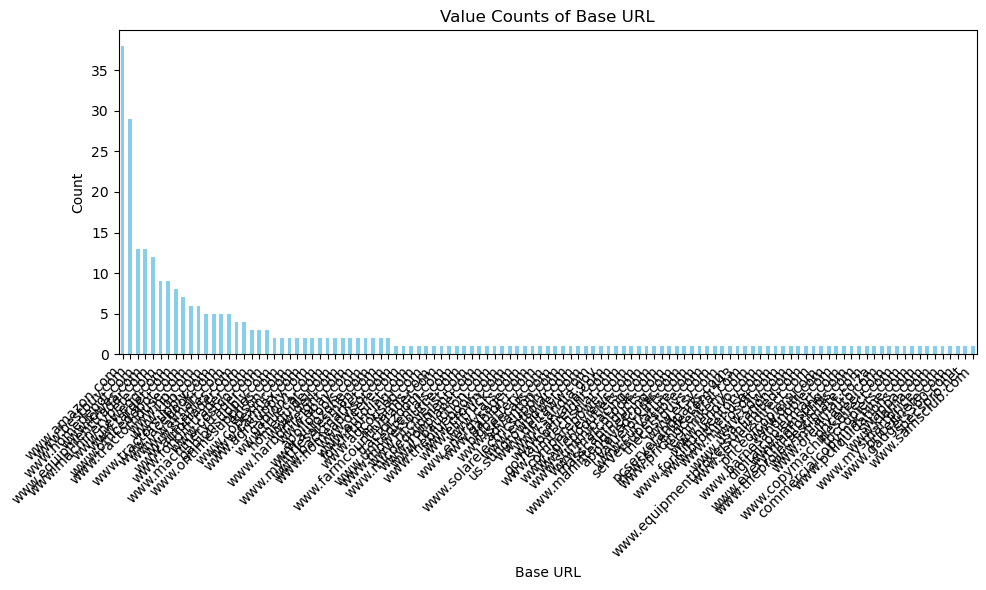

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataframe creation (replace this with your actual dataframe)
# For example purposes, let's create a sample dataframe

# Calculate value counts of 'base_url' and sort in descending order
value_counts = df['base_url'].value_counts().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size as needed
value_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Base URL')
plt.ylabel('Count')
plt.title('Value Counts of Base URL')

# Rotate x-axis labels for better readability if there are many URLs
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Display the plot
plt.show()


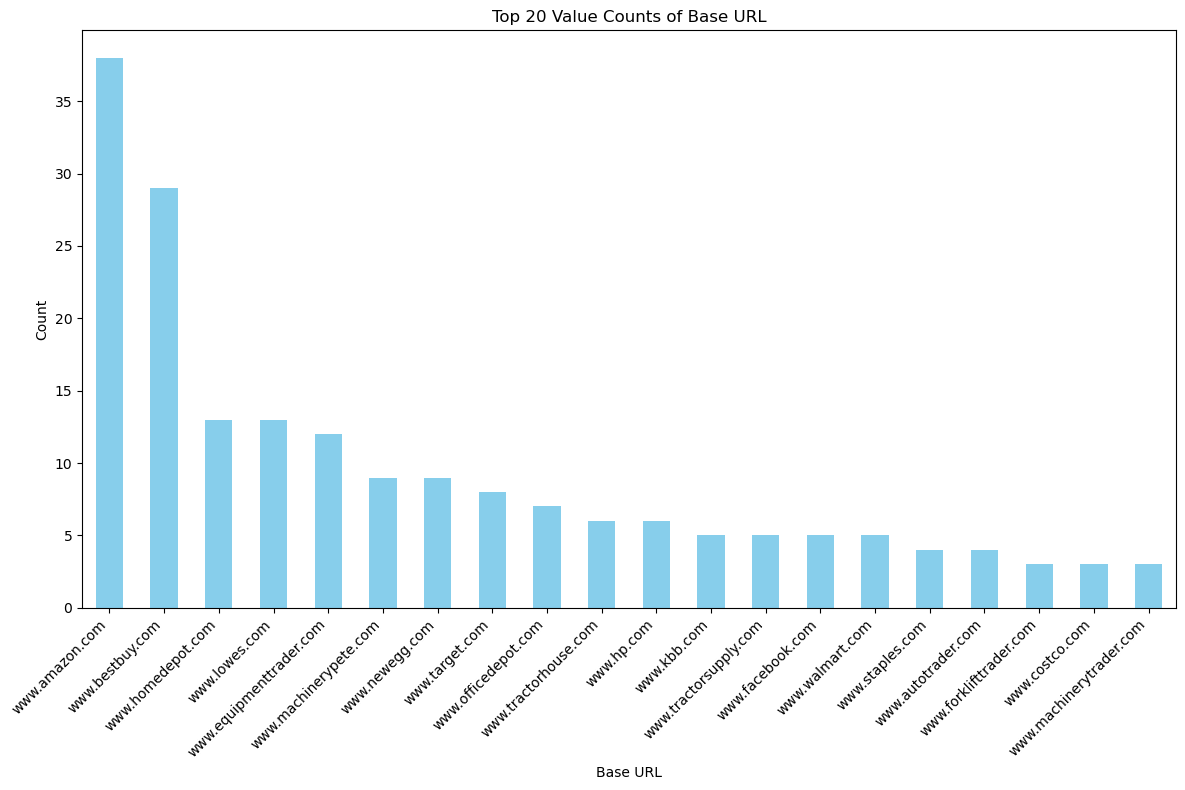

In [35]:
# Calculate value counts of 'base_url' and sort in descending order
value_counts = df['base_url'].value_counts().sort_values(ascending=False)

# Restrict to top 20 most frequent base URLs
top_n = 20
top_value_counts = value_counts.head(top_n)

# Plotting the bar chart
plt.figure(figsize=(12, 8))  # Adjusted figure size for better readability
top_value_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Base URL')
plt.ylabel('Count')
plt.title(f'Top {top_n} Value Counts of Base URL')

# Rotate x-axis labels for better readability if there are many URLs
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Display the plot
plt.show()

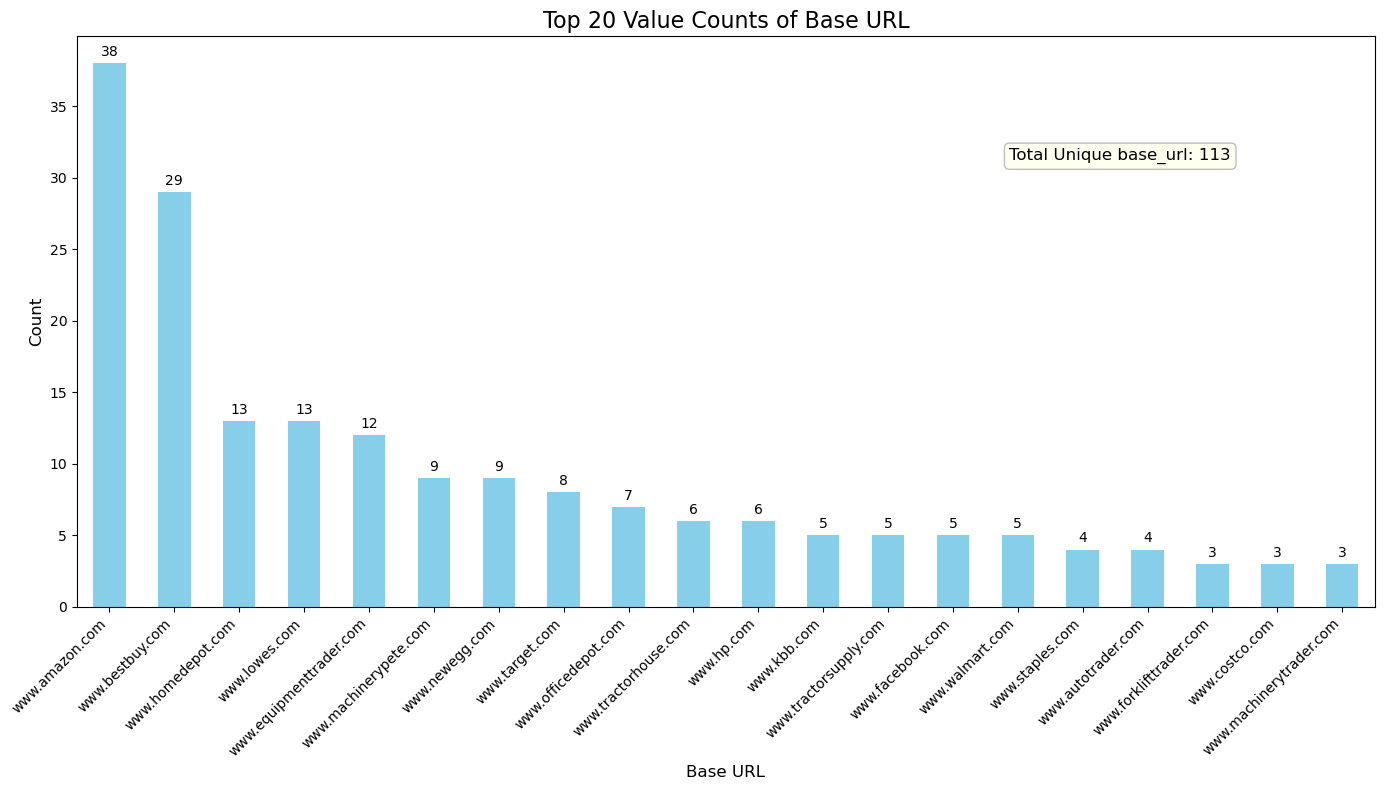

In [39]:
# Calculate value counts of 'base_url' and sort in descending order
value_counts = df['base_url'].value_counts().sort_values(ascending=False)

# Restrict to top 20 most frequent base URLs
top_n = 20
top_value_counts = value_counts.head(top_n)

# Calculate the total number of unique 'base_url' values
total_unique = df['base_url'].nunique()

# Plotting the bar chart
plt.figure(figsize=(14, 8))  # Increased figure size for better readability
bars = top_value_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Base URL', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title(f'Top {top_n} Value Counts of Base URL', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding count labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Adding an annotation for total unique 'base_url' values
plt.annotate(f'Total Unique base_url: {total_unique}',
             xy=(0.9, 0.8), xycoords='axes fraction',
             xytext=(-10, -10), textcoords='offset points',
             ha='right', va='bottom',
             fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", 
                       edgecolor='gray', 
                       facecolor='lightyellow', 
                       alpha=0.5))

# Adjust layout to prevent clipping of tick-labels and annotations
plt.tight_layout()

# Display the plot
plt.show()

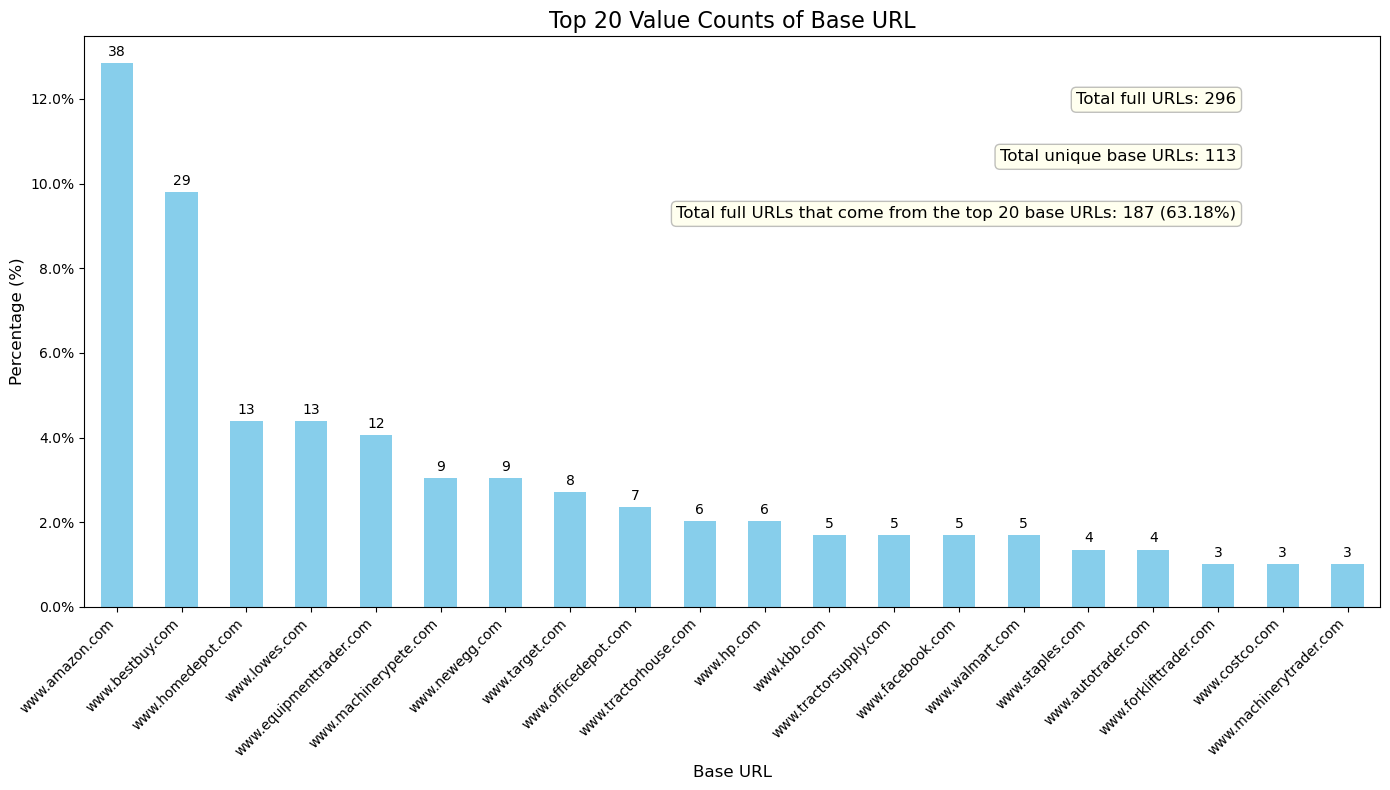

In [51]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Calculate value counts of 'base_url' and sort in descending order
value_counts = df['base_url'].value_counts().sort_values(ascending=False)

# Restrict to top 20 most frequent base URLs
top_n = 20
top_value_counts = value_counts.head(top_n)

# Calculate the total number of unique 'base_url' values
total_unique = df['base_url'].nunique()

# Calculate total counts for percentage calculation
total_counts = value_counts.sum()

# Calculate the total counts represented by the top 'base_url' values
top_total_counts = top_value_counts.sum()

# Calculate percentages
percentages = (top_value_counts / total_counts) * 100

# Plotting the bar chart
plt.figure(figsize=(14, 8))  # Increased figure size for better readability
bars = percentages.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Base URL', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.title(f'Top {top_n} Value Counts of Base URL', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Format y-axis to display percentages
plt.gca().yaxis.set_major_formatter(PercentFormatter())

# Adding count annotations on top of each bar
for bar, count in zip(bars.patches, top_value_counts):
    height = bar.get_height()
    plt.annotate(f'{count}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Adding an annotation for total unique 'base_url' values
plt.annotate(f'Total full URLs: {total_counts}',
             xy=(0.9, 0.9), xycoords='axes fraction',
             xytext=(-10, -10), textcoords='offset points',
             ha='right', va='bottom',
             fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", 
                       edgecolor='gray', 
                       facecolor='lightyellow', 
                       alpha=0.5))
plt.annotate(f'Total unique base URLs: {total_unique}',
             xy=(0.9, 0.8), xycoords='axes fraction',
             xytext=(-10, -10), textcoords='offset points',
             ha='right', va='bottom',
             fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", 
                       edgecolor='gray', 
                       facecolor='lightyellow', 
                       alpha=0.5))
plt.annotate(f'Total full URLs that come from the top 20 base URLs: {top_total_counts} ({top_total_counts/total_counts*100:.2f}%)',
             xy=(0.9, 0.7), xycoords='axes fraction',
             xytext=(-10, -10), textcoords='offset points',
             ha='right', va='bottom',
             fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", 
                       edgecolor='gray', 
                       facecolor='lightyellow', 
                       alpha=0.5))

# Adjust layout to prevent clipping of tick-labels and annotations
plt.tight_layout()

# Display the plot
plt.show()